In [2]:
import numpy as np

In [3]:
from module import *

In [4]:
from matplotlib import pyplot as plt

In [233]:
data = np.loadtxt('Admission_Predict.csv',delimiter=",", skiprows=1)

In [234]:
#normalización de data 
norm_t_set = np.array([np.zeros(len(data))])
for arr in data.T:
    norm_tuple = []
    for index in range(len(arr)):
        norm_tuple.append((arr[index] - arr.min())/ (arr.max()- arr.min()))
    norm_t_set = np.vstack((norm_t_set, np.array(norm_tuple)))
data = norm_t_set[1:,]
data = data.T

In [235]:
#training set
t_set = data[:240,1:]
#cross validation set
cv_set = data[240:320,1:] 
#test set
test = data[320:,1:]

In [291]:
#slice de data entre matriz de features y vector de variable a predecir
X = np.vstack((
    np.ones(len(t_set)),
    t_set[:,].T
)).T

y = t_set[:,len(t_set[0])-1:len(t_set[0])]

In [254]:
m, n = X.shape
X.shape

(240, 9)

In [255]:
#Después de múltiples generaciones random, se encontró que theta_0 que brindaba los mejores resultados, era:
#theta_0 = np.random.rand(n, 1)
theta_0 = np.array([
 [-0.06706054],
 [ 0.21327747],
 [-0.19349977],
 [ 0.10454866],
 [-0.06015129],
 [ 0.28915204],
 [ 0.27315269],
 [-0.00179598],
 [ 0.50185317]])

In [256]:
theta_0

array([[-0.06706054],
       [ 0.21327747],
       [-0.19349977],
       [ 0.10454866],
       [-0.06015129],
       [ 0.28915204],
       [ 0.27315269],
       [-0.00179598],
       [ 0.50185317]])

In [257]:
theta, costs, gradient_norms = gradient_descent(
    X,
    y,
    theta_0,
    linear_cost_regular,
    linear_cost_derivate_regular,
    alpha=0.0001,
    threshold=0.001,
    max_iter=30000,
    lamda=0)

In [258]:
#Cálculo de coeficiente de regresión (R^2)
r2 = (((y-y.mean())**2).sum()-((np.matmul(X, theta)-y)**2).sum())/((y-y.mean())**2).sum()
r2

0.9157459599835907

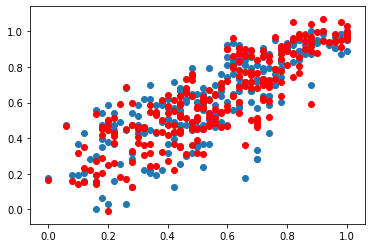

In [293]:
plt.scatter(X[:, 1], y)

plt.scatter(X[:, 1], np.matmul(X, theta), color='red')

plt.show()

### Cross-Validation
Después de obtener el theta que mejor resultados brinda, se realizan las pruebas con el cross-validation set para tunear de mejor manera el modelo. 

In [285]:
cv_set.shape

(80, 8)

In [286]:
cv_x = np.vstack((
    np.ones(len(cv_set)),
    cv_set[:,].T
)).T

cv_y = cv_set[:, 7]

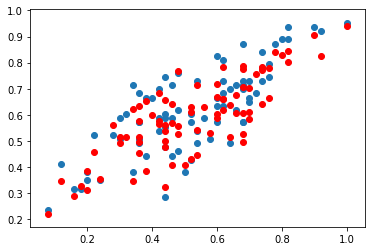

In [315]:
plt.scatter(cv_x[:, 1], cv_y)
plt.scatter(cv_x[:, 1], np.matmul(cv_x, theta), color='red')
plt.show()

In [316]:
#Cálculo de coeficiente de regresión (R^2)
cv_y = cv_set[:,len(cv_set[0])-1:len(cv_set[0])]
r2 = (((cv_y-cv_y.mean())**2).sum()-((np.matmul(cv_x, theta)-cv_y)**2).sum())/((cv_y-cv_y.mean())**2).sum()
r2

0.8988839695897534

In [319]:
#Error Cuadrático Medio

ecm = (1/len(cv_set))*((np.matmul(cv_x, theta)-cv_y)**2).sum()
ecm

0.0022819972798434353

In [318]:
theta, costs, gradient_norms = gradient_descent(
    X,
    y,
    theta_0,
    linear_cost_regular,
    linear_cost_derivate_regular,
    alpha=0.0001,
    threshold=0.001,
    max_iter=30000,
    lamda=4)